In [75]:
# Code for unsteady 2D diffusion. 

%matplotlib notebook
from numpy import *
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [67]:
# Compact Finite difference code for second derivative

def d2u_CFD(u,dh):
    ng = size(u[1,:]);
    
    dder = zeros_like(u);
    ddx  = zeros_like(u);
    ddy  = zeros_like(u);
    
    A = zeros((ng,ng)); bx = zeros(ng); by = zeros(ng);

    #Evaluate d2u/dx2
    for i in range (1, ng-1):
        A[0,0] = 1; A[-1,-1] = 1;
        for j in range (1, ng-1):
            A[j][j-1:j+2] = [0.1, 1.0, 0.1];
            bx[j] = 1.2/(dh*dh)*(u[i-1,j]-2*u[i,j]+u[i+1,j]);
        Ainv = linalg.inv(A);
        ddx[i,:] = Ainv.dot(bx);

    #print(A);

    #Evaluate d2u/dy2
    for j in range (1, ng-1):
        A[0,0] = 1; A[-1,-1] = 1;
        for i in range (1, ng-1):
            A[i][i-1:i+2] = [0.1, 1.0, 0.1];
            by[i] = 1.2/(dh*dh)*(u[i,j-1]-2*u[i,j]+u[i,j+1]);
        Ainv = linalg.inv(A);
        ddy[:,j] = Ainv.dot(by);

    #print(d2ux);
    dder = ddx + ddy;
    
    return dder;

In [103]:
#Define thermal conductivity:
k = 1e-2;

# Define grid parameters
Xmin = 0.0; Xmax = 1.0
Ymin = 0.0; Ymax = 1.0
ng = 21;
mx = ng; my = ng;

dh = (Xmax-Xmin)/(ng-1);
x = numpy.arange(Xmin, Xmax+dh, dh);
y = numpy.arange(Ymin, Ymax+dh, dh);

# Define time parameters
Tmin = 0.0; Tmax = 50.0;
dt = 1e-2; time = Tmin;
ntime = int((Tmax-Tmin)/dt);

A = zeros((ng,ng));
b = zeros(ng);
T = 100.0*ones((ng, ng));
Tmid = zeros((int((ntime+1)/100),ng));
Tnew = zeros_like(T);
ddT = zeros_like(T)

#Define solution parameters:
tol = 1.0E-6; Err = 1.0E10;

In [104]:
# Boundary conditions on temperature
T[0,:] = 100; T[-1,:] = 300; 
T[:,0] = 100; T[:,-1] = 300;
count = 0;

# Solve the system using fourth-order Compact Finite Difference Scheme
for iter in range (ntime):
    ddT = d2u_CFD(T, dh);
    
    Tnew[1:-1,1:-1] = T[1:-1,1:-1] + k*dt*ddT[1:-1,1:-1];
    
    # Impose boundary conditions
    Tnew[0,:] = 100; Tnew[-1,:] = 300; 
    Tnew[:,0] = 100; Tnew[:,-1] = 300;
    
    #Copy new values into old arrays
    T = numpy.copy(Tnew);
    if (mod(iter,100) == 0):
        Tmid[count][:] = copy(Tnew[11,:]);
        count = count + 1
    
    time = time + dt;

In [98]:
ng, ng = numpy.meshgrid(x,y)

<IPython.core.display.Javascript object>


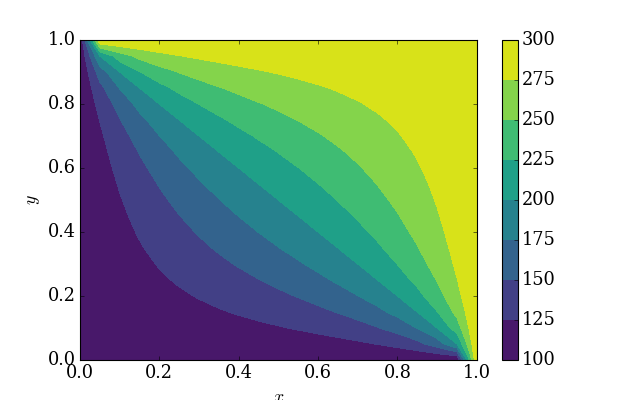

In [109]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,Tnew,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

<IPython.core.display.Javascript object>


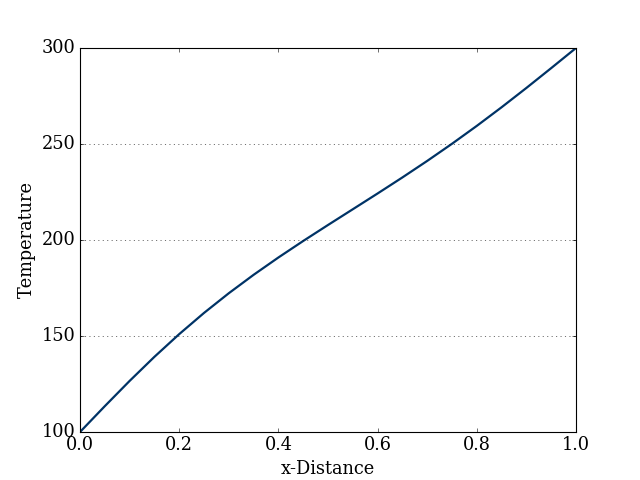

In [113]:
from matplotlib import *

def animate(data):
    x = numpy.linspace(0,1,ng)
    y = data
    line.set_data(x,y)
    return line,

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,1),ylim=(100,300),xlabel=('x-Distance'),ylabel=('Temperature'));
ax.set_yticks([100, 150, 200, 250, 300], minor=True)
ax.yaxis.grid(True, which='minor')
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=Tmid, interval=50)

In [102]:
print(iter)

4999
